In [1]:
import os
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import utils
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim  
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 
import math
import torchvision.models as models

In [2]:
TRAINING_PATH = 'dataset/dataset/train/'
TESTING_PATH = 'dataset/dataset/test/'

In [3]:
def load_split_train_test(datadir, valid_size=.2):
    train_transforms = transforms.Compose([transforms.Resize(256),
                                           transforms.CenterCrop(224),
                                           transforms.RandomHorizontalFlip(0.5),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    valid_transforms = transforms.Compose([transforms.Resize(256),
                                           transforms.CenterCrop(224),
                                           transforms.RandomHorizontalFlip(0.5),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    
    train_data = torchvision.datasets.ImageFolder(datadir, transform=train_transforms)
    valid_data = torchvision.datasets.ImageFolder(datadir, transform=valid_transforms)
    
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)
    
    from torch.utils.data.sampler import SubsetRandomSampler
    
    train_idx, valid_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=16)
    validloader = torch.utils.data.DataLoader(valid_data,
                   sampler=valid_sampler, batch_size=16)
    return trainloader, validloader


trainloader, validloader = load_split_train_test(TRAINING_PATH, .2)
print(trainloader.dataset.classes)
print(validloader.dataset.classes)

['bedroom', 'coast', 'forest', 'highway', 'insidecity', 'kitchen', 'livingroom', 'mountain', 'office', 'opencountry', 'street', 'suburb', 'tallbuilding']
['bedroom', 'coast', 'forest', 'highway', 'insidecity', 'kitchen', 'livingroom', 'mountain', 'office', 'opencountry', 'street', 'suburb', 'tallbuilding']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([16, 3, 224, 224]) torch.Size([16])


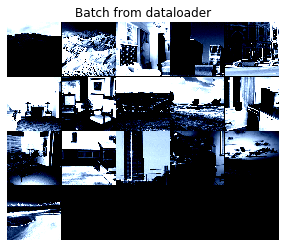

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 torch.Size([16, 3, 224, 224]) torch.Size([16])


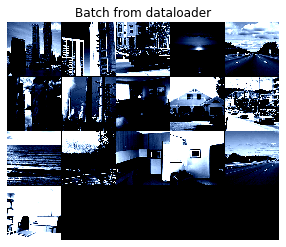

2 torch.Size([16, 3, 224, 224]) torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


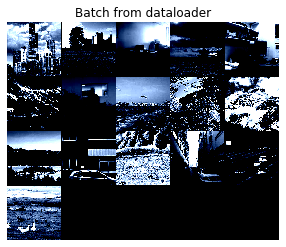

3 torch.Size([16, 3, 224, 224]) torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


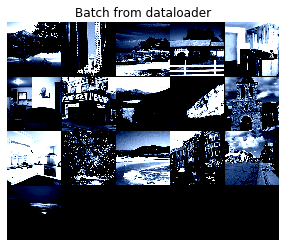

4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 torch.Size([16, 3, 224, 224]) torch.Size([16])


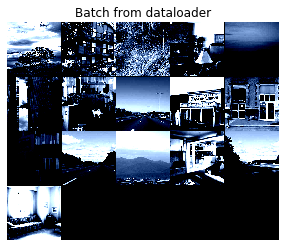

5 torch.Size([16, 3, 224, 224]) torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


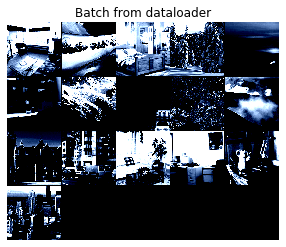

6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 torch.Size([16, 3, 224, 224]) torch.Size([16])


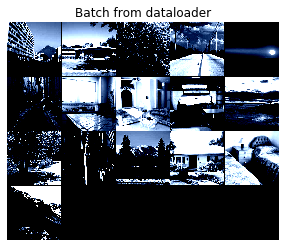

7 torch.Size([16, 3, 224, 224]) torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


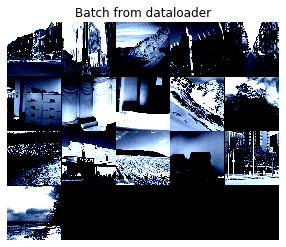

8 torch.Size([16, 3, 224, 224]) torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


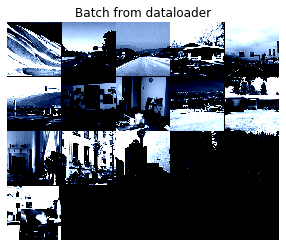

9 torch.Size([16, 3, 224, 224]) torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


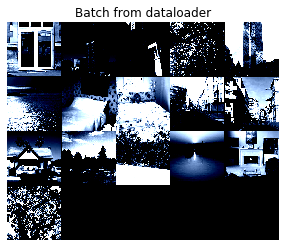

10 torch.Size([16, 3, 224, 224]) torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


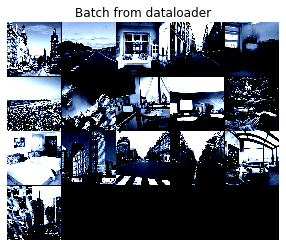

11

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 torch.Size([16, 3, 224, 224]) torch.Size([16])


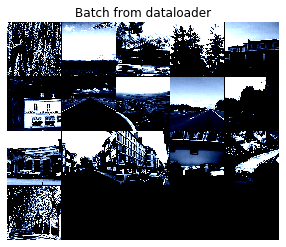

12

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 torch.Size([16, 3, 224, 224]) torch.Size([16])


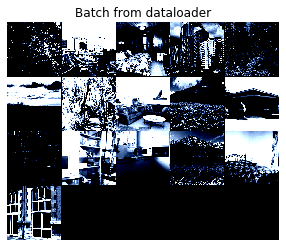

13 torch.Size([16, 3, 224, 224]) torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


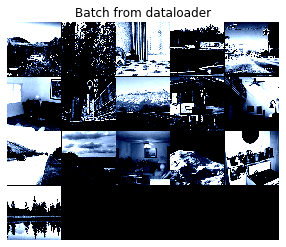

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14 torch.Size([16, 3, 224, 224]) torch.Size([16])


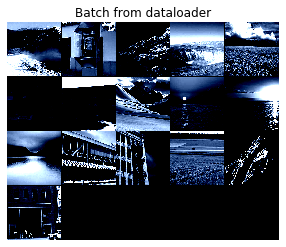

15 torch.Size([16, 3, 224, 224]) torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


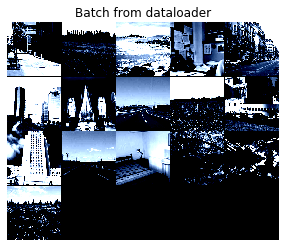

In [4]:
def show_batch(imgs):
    grid = utils.make_grid(imgs,nrow=5)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title('Batch from dataloader')


for i, (batch_x, batch_y) in enumerate(trainloader):
    if i < 16:
        print(i, batch_x.size(), batch_y.size())

        show_batch(batch_x)
        plt.axis('off')
        plt.show()

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnext50_32x4d(pretrained=True)
model = model.cuda()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [20]:
optimizer = optim.SGD(model.parameters(), lr=0.000001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [24]:
epochs = 10
steps = 0
running_loss = 0
print_every = 200
train_losses, valid_losses = [], []


for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(inputs)
        #logps = model.forward(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            valid_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in validloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    output = model(inputs)
                    #logps = model.forward(inputs)
                    batch_loss = criterion(output, labels)
                    valid_loss += batch_loss.item()
                    
                    ps = torch.exp(output)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            train_losses.append(running_loss/len(trainloader))
            valid_losses.append(valid_loss/len(validloader))                    
            print(f"Epoch {epoch+1}/{epochs}. "
                  f"Train loss: {running_loss/print_every:.3f}. "
                  f"valid loss: {valid_loss/len(validloader):.3f}. "
                  f"valid accuracy: {accuracy/len(validloader):.3f}")
            running_loss = 0
            model.train()
            
#torch.save(model, 'aerialmodel.pth')

Epoch 2/10. Train loss: 0.007. valid loss: 0.141. valid accuracy: 0.953
Epoch 3/10. Train loss: 0.009. valid loss: 0.149. valid accuracy: 0.957
Epoch 5/10. Train loss: 0.007. valid loss: 0.176. valid accuracy: 0.942
Epoch 6/10. Train loss: 0.004. valid loss: 0.145. valid accuracy: 0.950
Epoch 8/10. Train loss: 0.007. valid loss: 0.150. valid accuracy: 0.950
Epoch 9/10. Train loss: 0.006. valid loss: 0.153. valid accuracy: 0.950
Epoch 10/10. Train loss: 0.008. valid loss: 0.140. valid accuracy: 0.951


In [31]:
# torch.save(model, 'model_93942')

In [21]:
# torch.save(model, 'model_93750')

In [37]:
# torch.save(model, 'model_94711')

In [49]:
# torch.save(model, 'model_94903')

In [17]:
# torch.save(model, 'model_95192')

In [26]:
# torch.save(model, 'model_95480')

In [10]:
def image_loader(loader, image_name):
    image = Image.open(image_name)
    image = image.convert('RGB')
    image = loader(image).float()
    #image = torch.tensor(image, requires_grad=True)
    image.clone().detach().requires_grad_(True)
    image = image.unsqueeze(0)
    return image

data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [11]:
category = {
 0:'bedroom',
 1:'coast',
 2:'forest',
 3:'highway',
 4:'insidecity',
 5:'kitchen',
 6:'livingroom',
 7:'mountain',
 8:'office',
 9:'opencountry',
 10:'street',
 11:'suburb',
 12:'tallbuilding'}

In [25]:
model.eval()

predict_df = pd.read_csv('sameple_submission.csv')


for i in range(1040):
    print('{:04d}'.format(i))
    img = image_loader(data_transforms, TESTING_PATH + '\image_'+'{:04d}'.format(i)+'.jpg')
    img = img.to(device)
    #var_image = Variable(img)

    output = model(img)
    prediction = int(torch.max(output.data, 1)[1])#.numpy())
    #prediction = int(torch.max(F.softmax(output).cpu(), 1)[1].numpy())
    
    print(prediction)
    
    predict_df.loc[i,'label'] = category[prediction]
    
predict_df.to_csv('out_resnext50_batch16.csv', index=False)

0000
3
0001
0
0002
11
0003
0
0004
12
0005
4
0006
1
0007
2
0008
1
0009
10
0010
3
0011
0
0012
7
0013
10
0014
4
0015
1
0016
3
0017
6
0018
5
0019
4
0020
3
0021
7
0022
3
0023
4
0024
8
0025
3
0026
2
0027
0
0028
7
0029
2
0030
10
0031
2
0032
0
0033
3
0034
3
0035
11
0036
10
0037
1
0038
2
0039
11
0040
11
0041
0
0042
11
0043
6
0044
6
0045
10
0046
1
0047
4
0048
10
0049
12
0050
5
0051
8
0052
6
0053
7
0054
11
0055
0
0056
12
0057
3
0058
10
0059
5
0060
2
0061
6
0062
11
0063
0
0064
1
0065
8
0066
9
0067
12
0068
5
0069
0
0070
4
0071
3
0072
0
0073
6
0074
5
0075
1
0076
4
0077
1
0078
9
0079
9
0080
7
0081
2
0082
6
0083
10
0084
6
0085
7
0086
8
0087
2
0088
5
0089
10
0090
11
0091
10
0092
8
0093
11
0094
9
0095
6
0096
10
0097
12
0098
8
0099
0
0100
3
0101
1
0102
12
0103
12
0104
5
0105
7
0106
9
0107
9
0108
0
0109
8
0110
6
0111
2
0112
6
0113
0
0114
3
0115
10
0116
6
0117
8
0118
10
0119
9
0120
3
0121
4
0122
5
0123
1
0124
12
0125
1
0126
2
0127
10
0128
11
0129
2
0130
6
0131
11
0132
5
0133
4
0134
4
0135
6
0136
12
0137
6
